## Pre-Processing Interfaces

#### Values Management Policy
- Lines with duplicate smiles will be dropped in favor of the one with lowest ```Energy_```, unless another
column is provided.
- Lines with ```nan```/missing values are dropped. 

In [4]:
%matplotlib inline
%load_ext autoreload

import pandas as pd
from processing_utils import *

### Data Pipeline Application

In [5]:
raw_dataset = pd.read_csv('./dataset/data.csv')

pruned_dataset = prune_dataset_lines(raw_dataset, remove_nan_lines=False, remove_nan_cols=True)
print("Raw dataset shape =", raw_dataset.shape, " Pruned dataset shape =", pruned_dataset.shape)

encoded_pruned_data = encode_smiles_column_of(pruned_dataset, 'count_encoding') # change to one_hot_encoding here
print("Encoded dataset shape =", encoded_pruned_data.shape)

X_train, y_train, X_test, y_test = return_required_data(
    encoded_pruned_data, 
    ['Energy_(kcal/mol)', 'Energy DG:kcal/mol)'], 
    normalize=True
)

Raw dataset shape = (39926, 24)  Pruned dataset shape = (12865, 6)
Encoded dataset shape = (12865, 35)


### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR = LR.fit(X_train, y_train)

y_pred_test = LR.predict(X_test)
y_pred_train = LR.predict(X_train)

print(LR.intercept_)
print("mse y_train, y_pred_train =", mean_squared_error(y_train, y_pred_train))
print("mse y_test, y_pred_test =", mean_squared_error(y_test, y_pred_test))

print(mean_squared_error(y_test[:10, :], LR.predict(X_test[:10, :])))

[4.06343295e-16 3.15038262e-16]
mse y_train, y_pred_train = 2.733692055295151e-06
mse y_test, y_pred_test = 0.0013341668353145457
0.0015633542405466424


In [7]:
print("Cross validation error = ", cross_validation_of( LR, np.vstack((X_train, X_test)), np.vstack((y_train, y_test)) ))

Cross validation error =  0.0003447898366501528


In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, X_train, y_train)
print("%f accuracy with a standard deviation of %f" % (scores.mean(), scores.std()))

0.999997 accuracy with a standard deviation of 0.000000


### RBF Network Regression

In [12]:
# TODO : Use RBF.py to see performance.

### Keras and Tensorflow Neural Network (NN)

In [70]:
import tensorflow as tf
from tensorflow import keras

num_features = X_train.shape[1]

tiny_model = keras.Sequential([
    keras.layers.Dense(64, activation='elu', input_dim=33),
    keras.layers.Dense(2)
])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
tiny_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


(9005, 33) (9005, 2) (3860, 33) (3860, 2)


In [71]:
histories = {}
histories['Tiny'] = tiny_model.fit(X_train, y_train, epochs=150, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/150
19/19 [==============================] - 0s 7ms/step - loss: 1.2007 - mse: 1.2007 - val_loss: 0.6128 - val_mse: 0.6128
Epoch 2/150
19/19 [==============================] - 0s 3ms/step - loss: 0.4240 - mse: 0.4240 - val_loss: 0.3011 - val_mse: 0.3011
Epoch 3/150
19/19 [==============================] - 0s 3ms/step - loss: 0.2377 - mse: 0.2377 - val_loss: 0.1902 - val_mse: 0.1902
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 0.1604 - mse: 0.1604 - val_loss: 0.1371 - val_mse: 0.1371
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 0.1194 - mse: 0.1194 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 0.0937 - mse: 0.0937 - val_loss: 0.0838 - val_mse: 0.0838
Epoch 7/150
19/19 [==============================] - 0s 2ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 8/150
19/19 [==============================] - 0s 4ms/step - loss: 0.0653 - m

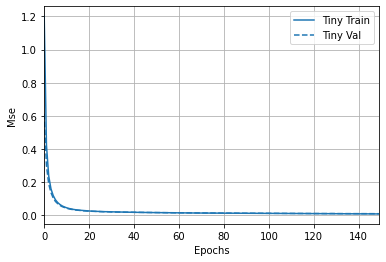

In [72]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

plotter = tfdocs.plots.HistoryPlotter(metric='mse')
plotter.plot(histories)


In [86]:

fat_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=33),
    keras.layers.Dense(512, activation='relu', input_dim=512),
    keras.layers.Dense(512, activation='relu', input_dim=512),
    keras.layers.Dense(512, activation='relu', input_dim=512),
    keras.layers.Dense(2)
])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
fat_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


(9005, 33) (9005, 2) (3860, 33) (3860, 2)


In [92]:
histories['Fat'] = fat_model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 0s 22ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 2/1000
19/19 [==============================] - 0s 18ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 3/1000
19/19 [==============================] - 0s 18ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/1000
19/19 [==============================] - 0s 18ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5/1000
19/19 [==============================] - 0s 21ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 7/1000
19/19 [==============================] - 0s 18ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/1000
19/19 [==============================] - 0s 19ms/step - 

1/1 [==============================] - 0s 16ms/step
0.0012283592866107647


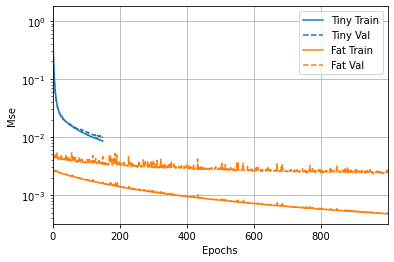

In [93]:
import matplotlib.pyplot as plt

plt.yscale("log")
plotter = tfdocs.plots.HistoryPlotter(metric='mse')
plotter.plot(histories)

print(mean_squared_error(y_test[:10, :], fat_model.predict(X_test[:10, :])))